In [1]:
from google.colab import files
uploaded = files.upload()

Saving customers-1000.csv to customers-1000 (2).csv


In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading file
df = pd.read_csv('customers-1000.csv')
df.sample(5)

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
957,958,b8ef0f40D818b8D,Shelly,Green,Rose-Mccarthy,New Seanmouth,Jordan,(693)244-7476x383,021.366.2089x277,johnathan92@huff.com,4/28/2022,http://quinn.com/
562,563,E8DC64C4e67fDA3,Ronnie,Erickson,"Miller, Lucero and Mccann",South Miamouth,Papua New Guinea,106-963-0970,001-193-796-3473x34614,tricia95@mcdonald.com,12/21/2021,http://www.valenzuela.com/
484,485,EC8627a6230b960,Caleb,Eaton,"Franco, Blankenship and Nolan",Rileyburgh,Sri Lanka,1736964162,359.300.6512,weverett@dixon.info,7/13/2020,https://www.bell.net/
269,270,EC9eD68ff2Eb4f4,Karen,Leblanc,Farley Inc,Deanberg,Denmark,334.155.1758,(175)473-7359x190,poneill@cameron.com,12/10/2021,https://lozano.org/
351,352,C3dE0b33e7fdcAd,Jesus,Rogers,Shields PLC,Jarviston,Afghanistan,738-112-1611x7396,727-063-4061x3967,frencheddie@contreras.org,2/1/2021,https://mccoy-harrington.info/


## Data Cleaning and Preprocessing

In [4]:
# check for null values
df.isnull().sum()

,0
Index,0
Customer Id,0
First Name,0
Last Name,0
Company,0
City,0
Country,0
Phone 1,0
Phone 2,0
Email,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              1000 non-null   int64 
 1   Customer Id        1000 non-null   object
 2   First Name         1000 non-null   object
 3   Last Name          1000 non-null   object
 4   Company            1000 non-null   object
 5   City               1000 non-null   object
 6   Country            1000 non-null   object
 7   Phone 1            1000 non-null   object
 8   Phone 2            1000 non-null   object
 9   Email              1000 non-null   object
 10  Subscription Date  1000 non-null   object
 11  Website            1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [6]:
# df.describe()

In [7]:
df.shape

(1000, 12)

In [8]:
# check for duplicates

duplicate_rows=df.duplicated()
print("Number of Duplicated rows:", duplicate_rows.sum())

Number of Duplicated rows: 0


### Formatting Dates

In [9]:
 # convert 'subscription date' datatype from object to datetime

df['Subscription Date']=pd.to_datetime(df['Subscription Date'])
# df['Subscription Date'].dtype

In [10]:
# checking for invalid dates
df['Subscription Date'].isnull().sum()

0

In [11]:
df.sample(2)

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
253,254,5B789BA48f72Cd2,Jon,Gay,"Frey, Howard and Burns",Lake Mike,Kenya,001-464-405-4973x992,429-643-4061x065,hmelendez@jenkins-ingram.org,2022-02-23,https://www.garza.com/
52,53,D02c86e781bA06f,Gloria,Mosley,Calderon Ltd,East Reneefurt,Fiji,296-297-8174x50153,629-157-7866x510,escobardeanna@sawyer-obrien.info,2022-05-06,https://www.huber.info/


In [12]:
df.columns

Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website'],
      dtype='object')

### Formatting phone numbers

In [13]:
# Removing non-numeric characters from phone numbers
df['Phone 1'] = df['Phone 1'].str.replace(r'\D', '', regex=True)
df['Phone 2'] = df['Phone 2'].str.replace(r'\D', '', regex=True)

In [14]:
# validating phone numbers
df['valid_phone_1'] = df['Phone 1'].apply(lambda x: len(x) == 10)
df['valid_phone_2'] = df['Phone 2'].apply(lambda x: len(x) == 10)

In [15]:
# Filtering rows with valid phone numbers
df = df[(df['valid_phone_1']) & (df['valid_phone_2'])]

In [16]:
# Dropping helper columns (valid_phone_1, valid_phone_2)
df = df.drop(columns=['valid_phone_1', 'valid_phone_2'])

In [17]:
df.sample(1)

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
794,795,77eb3D79aE7FFB3,Kayla,Fleming,Gregory Group,Clarketown,Saint Barthelemy,5717904196,3922649867,emma49@dunlap.biz,2021-01-12,https://www.joyce.biz/


In [18]:
df.shape

(108, 12)

### Formatting emails

In [19]:
import re
def validate_email(Email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, Email))

df['valid_email'] = df['Email'].apply(validate_email)

In [20]:
# removing invalid emails
df = df[df['valid_email']]

In [21]:
df.sample(1)

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,valid_email
373,374,Ba6f5aC5B3A0B7d,Erin,Gill,Mosley-Whitney,South Rachelchester,Iran,1882277401,1894798815,dixonmelissa@brooks.com,2021-07-12,http://bentley.com/,True


In [22]:
# checking for missing values

missing_values = df.isnull().sum()
print(missing_values)

Index                0
Customer Id          0
First Name           0
Last Name            0
Company              0
City                 0
Country              0
Phone 1              0
Phone 2              0
Email                0
Subscription Date    0
Website              0
valid_email          0
dtype: int64


In [23]:
# dropping unnecessary column 'index'

df = df.drop(columns=['Index'], axis=1)

In [24]:
df = df.drop(columns=['valid_email'])

In [25]:
df.sample(1)

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
564,b57CabD45Be54e4,Kristen,Williamson,Doyle-Rodgers,East Kayleetown,French Southern Territories,1227958554,1650534906,watkinskaylee@pacheco.biz,2020-04-27,https://ho-medina.net/


In [26]:
print(df.dtypes)

Customer Id                  object
First Name                   object
Last Name                    object
Company                      object
City                         object
Country                      object
Phone 1                      object
Phone 2                      object
Email                        object
Subscription Date    datetime64[ns]
Website                      object
dtype: object


## Data Visualization

### Top 5 cities with highest number of customers

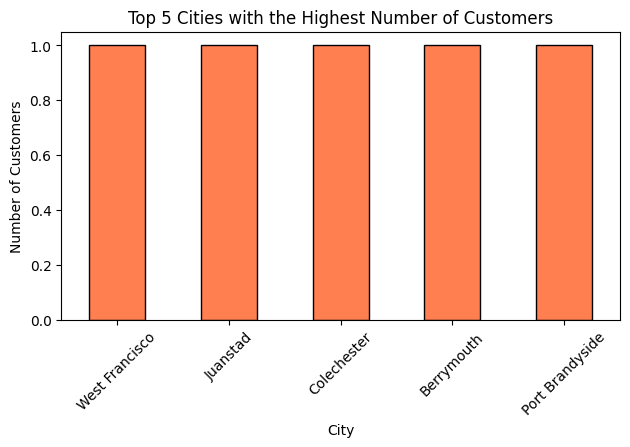

In [27]:
# top 5 cities with the highest number of customers
top_5_cities = df['City'].value_counts().head(5)

# bar plot
top_5_cities.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 5 Cities with the Highest Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Top 5 Countries with Highest Customers

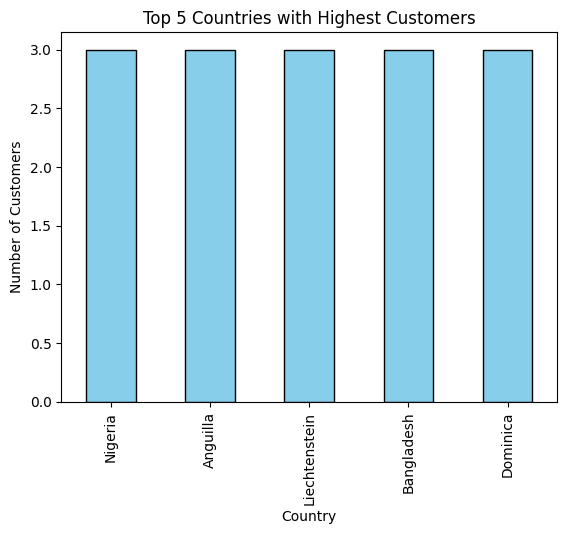

In [28]:
# customers count per country
country_counts = df['Country'].value_counts()

# top 5 countries
top_5_countries = country_counts.head(5)

# bar plot
top_5_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Countries with Highest Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


### Top 5 Companies with the Highest Number of Customers

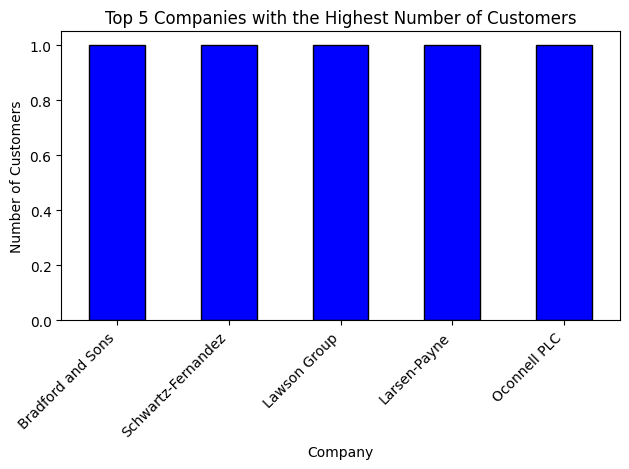

In [29]:
# customers count per company
company_counts = df['Company'].value_counts()

# top 5 companies
top_5_companies = company_counts.head(5)

# bar plot
top_5_companies.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 5 Companies with the Highest Number of Customers')
plt.xlabel('Company')
plt.ylabel('Number of Customers')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Top 5 Email Domains with the Most Customers

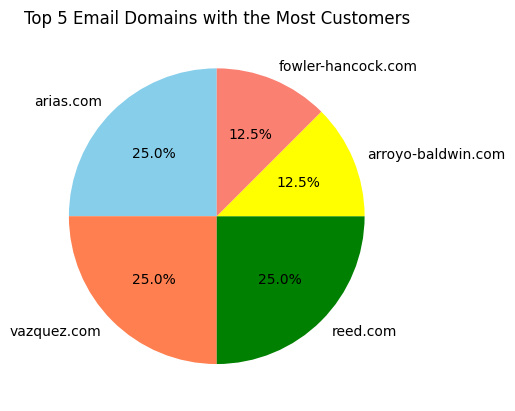

In [30]:
# Extracting the domain part from the email
df['Email Domain'] = df['Email'].str.split('@').str[1]

# Customers count per email domain
email_domain_counts = df['Email Domain'].value_counts()

# Getting the top 5
top_5_email_domains = email_domain_counts.head(5)

# piechart
top_5_email_domains.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral', 'green', 'yellow', 'salmon'])
plt.title('Top 5 Email Domains with the Most Customers')
plt.ylabel('')  # Removing the label for a cleaner look
plt.show()
